<center><h1>Masters_Daniel_HW6</h1></center>

Name: Daniel Maste
<br>
Github Username: damaster
<br>
USC ID: 6203966352

## 1. Tree-Based Methods

In [69]:
!pip install scikit-learn --upgrade

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Daniel\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



Import packages

In [72]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

### (a) Download the APS Failure data

In [73]:
training_df = pd.read_csv('aps_failure_training_set.csv', skiprows= 20)
test_df = pd.read_csv('aps_failure_test_set.csv', skiprows= 20)
training_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


### (b) Data Preparation

#### (i) Research what types of techniques are usually used

The data imputation techniques that are usually used for missing data are KNN, filling in data with: avg, max, min or mode, missing vaule prediction using an ML model. Filling in data with avg, min, max or mode is the least favorable option of the above listed techniques, the technique I will be using is KNN.

#### (ii) Calculate the coefficient of variation

In [74]:
#replace missing values
training_df.replace('na', np.nan, inplace=True)
test_df.replace('na', np.nan, inplace=True)
training_df['class'].replace('pos', 1, inplace=True)
training_df['class'].replace('neg', 0, inplace= True)
test_df['class'].replace('pos', 1, inplace=True)
test_df['class'].replace('neg', 0, inplace= True)
# train_set = training_df.iloc[:, 1:]
# test_set = test_df.iloc[:, 1:]
# cv_train_x = training_df.iloc[:, 1:]
# cv_train_y = training_df.iloc[:, 0]
# cv_test_x = test_df.iloc[:, 1:]
# cv_test_y = test_df.iloc[:, 0]
null_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
# null_impute.fit(cv_train_x, cv_train_y)
# train_fit = null_impute.fit(train_set)
train = null_impute.fit_transform(training_df.iloc[:, 1:])
test = null_impute.transform(test_df.iloc[:,1:]) 
y_train = training_df.iloc[:, 0]
y_test = test_df.iloc[:, 0]
new_train = pd.DataFrame(train)
new_test = pd.DataFrame(test)
print(new_train)
print(new_test)

            0         1             2              3    4     5    6    7    \
0       76698.0  0.713189  2.130706e+09     280.000000  0.0   0.0  0.0  0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314  0.0   0.0  0.0  0.0   
2       41040.0  0.713189  2.280000e+02     100.000000  0.0   0.0  0.0  0.0   
3          12.0  0.000000  7.000000e+01      66.000000  0.0  10.0  0.0  0.0   
4       60874.0  0.713189  1.368000e+03     458.000000  0.0   0.0  0.0  0.0   
...         ...       ...           ...            ...  ...   ...  ...  ...   
59995  153002.0  0.713189  6.640000e+02     186.000000  0.0   0.0  0.0  0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000  0.0   0.0  0.0  0.0   
59997     112.0  0.000000  2.130706e+09      18.000000  0.0   0.0  0.0  0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000  0.0   0.0  0.0  0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000  0.0   0.0  0.0  0.0   

       8       9    ...        160       161       

In [75]:
#calculating CV
concat_df = pd.concat([new_train, new_test], ignore_index = True)
cv = []
colval_list = [] 
for val in concat_df:
    col_vals = concat_df[val].tolist()
    s = np.std(col_vals)
    v = np.mean(col_vals)
    cv.append(s/v)
for j in cv:
    print("The coefficient of variation for feature "+str(cv.index(j))+ " is: "+str(j))

The coefficient of variation for feature 0 is: 4.3285793576589375
The coefficient of variation for feature 1 is: 2.207336846720093
The coefficient of variation for feature 2 is: 2.167784157382133
The coefficient of variation for feature 3 is: 193.95403116125019
The coefficient of variation for feature 4 is: 22.282116423193205
The coefficient of variation for feature 5 is: 18.19687814540017
The coefficient of variation for feature 6 is: 91.35068568825712
The coefficient of variation for feature 7 is: 42.174799457537965
The coefficient of variation for feature 8 is: 17.648270842662185
The coefficient of variation for feature 9 is: 8.758596487932927
The coefficient of variation for feature 10 is: 5.476635361461392
The coefficient of variation for feature 11 is: 2.9646350702296944
The coefficient of variation for feature 12 is: 2.3527075364256222
The coefficient of variation for feature 13 is: 2.8125739020801728
The coefficient of variation for feature 14 is: 6.275086220433838
The coeffici

#### (iii) Plot a correlation matrix

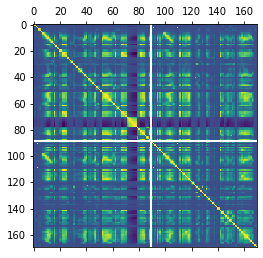

In [76]:
concat_df = pd.concat([new_train, new_test], ignore_index = True)
plt.matshow(concat_df.corr())
plt.show()

#### (iv) Make scatter plots and box plots

13 Highest CVs
      0           1
0    91  194.437044
1   109  194.087891
2     3  193.954031
3   122  193.043765
4   138  120.084110
5   134  116.137408
6    27  114.463628
7   136  111.945660
8     6   91.350686
9    29   86.293013
10   19   78.559476
11   51   77.894012
12   41   77.457251


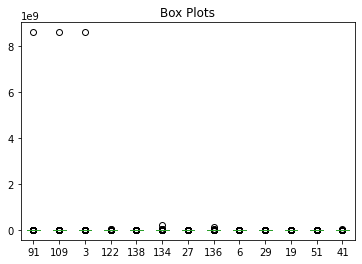

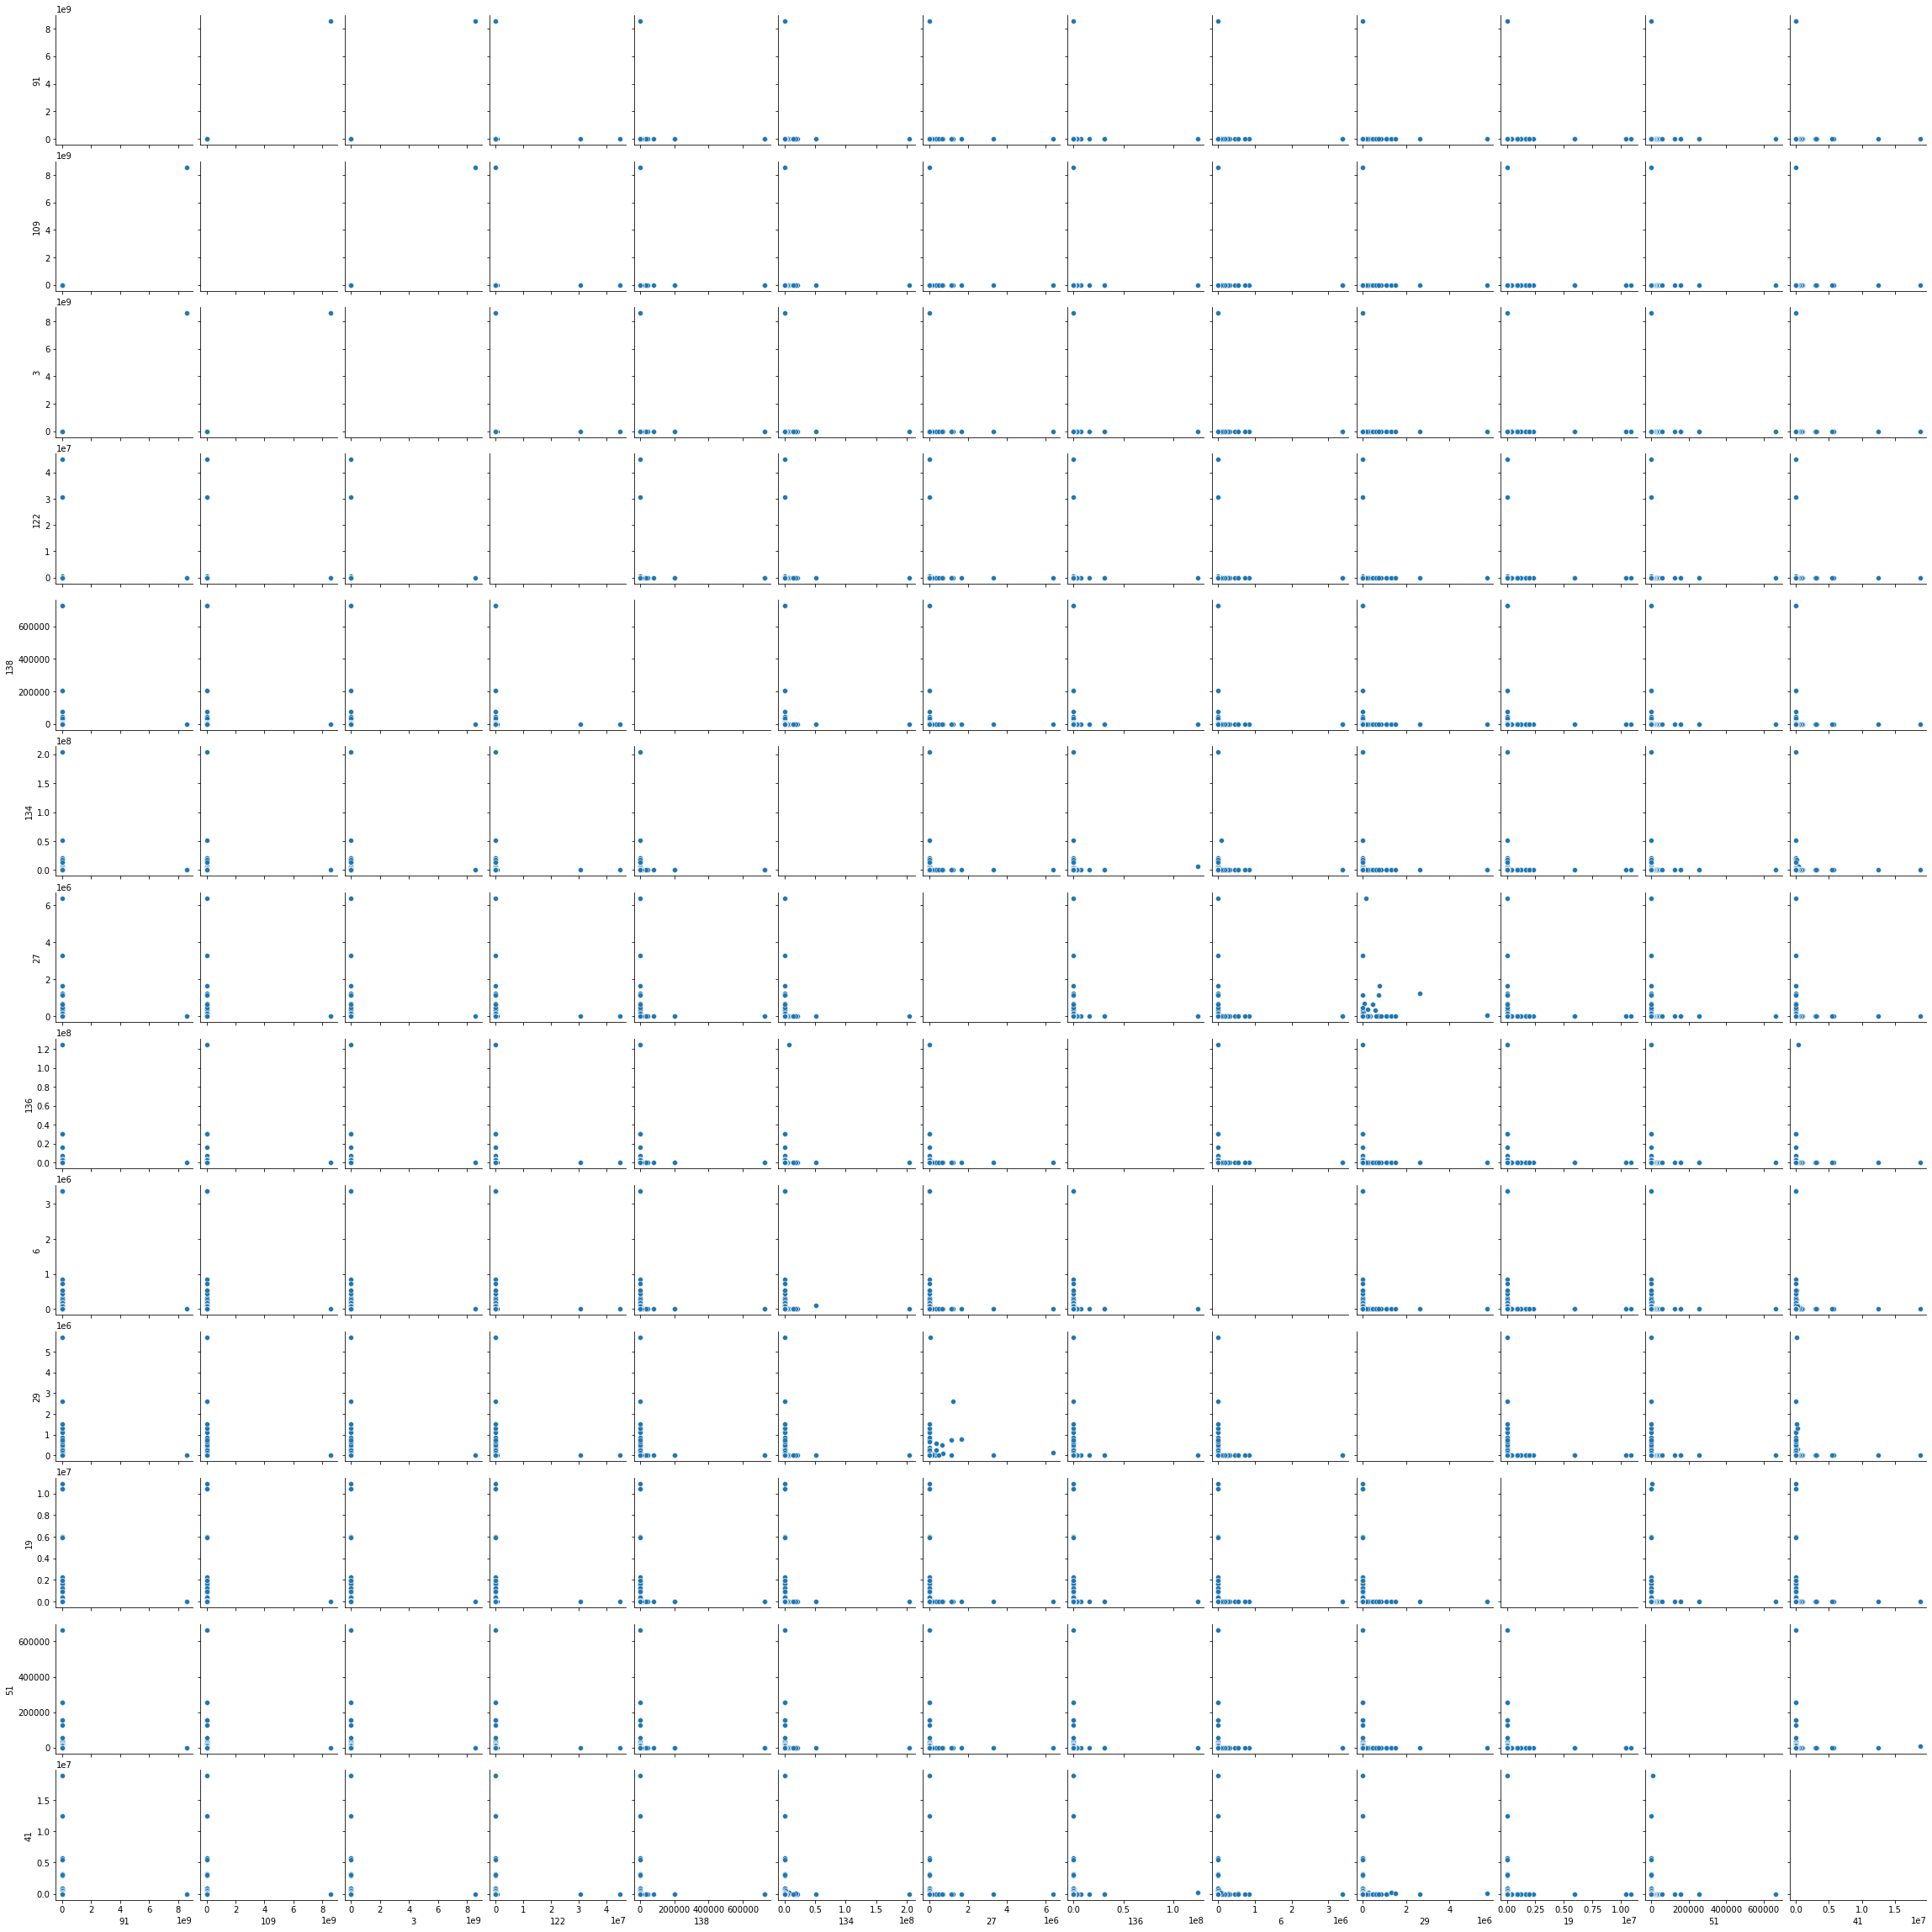

In [77]:
num_feat = math.floor(math.sqrt(170))
cv_dict = {}
for i in cv:
    cv_dict[cv.index(i)] = i
sorted_cv = sorted(cv_dict.items(), key = lambda x:x[1], reverse = True)
sorted_df = pd.DataFrame(sorted_cv)
highest_df = sorted_df[0:num_feat]
highest_df.rename(columns={0:'Index', 1:'CV'})
print(str(num_feat)+" Highest CVs")
print(highest_df)
con_high_df = concat_df[highest_df[0]]
con_high_df.plot(kind='box', title='Box Plots')
plt.show()
sns.pairplot(con_high_df, diag_kind='none')
# for i in con_high_df:
#     plt.boxplot(con_high_df[i])
#     plt.title('Box Plot for Feature: '+str(i))
#     plt.xlabel('Feature #'+str(i))
#     plt.show()
# print("No we cannot draw conclusions about the significance of the features just by looking at the scatter plots.")

#### (v) Is this data set imbalanced?

In [78]:
posneg_df = pd.concat([training_df['class'], test_df['class']], ignore_index=True)
print(posneg_df.value_counts())
print("\nThe data set is heavily imbalanced as there is significantly more negative class (0) values than positive class (1) values")


0    74625
1     1375
Name: class, dtype: int64

The data set is heavily imbalanced as there is significantly more negative class (0) values than positive class (1) values


### (c) Train a random forest

In [79]:
#Calculating Train Error
X_train = new_train.iloc[:, 1:]
X_test = new_test.iloc[:, 1:]
rand_for = RandomForestClassifier(oob_score=True)
rand_for.fit(X_train, y_train)
rand_for_pred_train = rand_for.predict(X_train)

In [80]:
rand_mse_train = mean_squared_error(y_train, rand_for_pred_train)
confusion_mat_train = confusion_matrix(y_train, rand_for_pred_train)
print("Train Error/Misclassification rate for training data: "+str(rand_mse_train))
print("Confusion Matrix:\n"+str(confusion_mat_train))

Train Error/Misclassification rate for training data: 0.0
Confusion Matrix:
[[59000     0]
 [    0  1000]]


In [81]:
#Calculating test Error/Confusion Matrix
rand_for_pred_test = rand_for.predict(X_test)
rand_mse_test = mean_squared_error(y_test, rand_for_pred_test)
confusion_mat_test = confusion_matrix(y_test, rand_for_pred_test)
print("Test Error/Misclassification rate for testing data: "+str(rand_mse_test))
print("Confusion Matrix:\n"+str(confusion_mat_test))

Test Error/Misclassification rate for testing data: 0.0074375
Confusion Matrix:
[[15610    15]
 [  104   271]]


The ROC for training and testing is depicted by the graphs below respectively


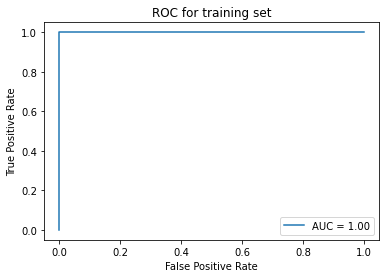

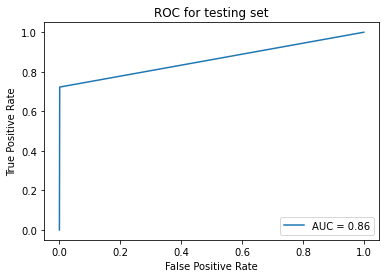

The AUC for training set is: 1.0
The AUC for test set is: 0.8608533333333334


In [82]:
#calculating the roc curve for training data
for_fpr_train, for_tpr_train, for_thresh_train= roc_curve(y_train, rand_for_pred_train)
for_fpr_test, for_tpr_test, for_thresh_test= roc_curve(y_test, rand_for_pred_test)
#calculating the auc
auc_train_1 = metrics.auc(for_fpr_train, for_tpr_train)
auc_test_1 = metrics.auc(for_fpr_test, for_tpr_test)
rand_for_plot_train = metrics.RocCurveDisplay(fpr=for_fpr_train, tpr=for_tpr_train, roc_auc=auc_train_1)
rand_for_plot_test = metrics.RocCurveDisplay(fpr=for_fpr_test, tpr=for_tpr_test, roc_auc=auc_test_1)
print('The ROC for training and testing is depicted by the graphs below respectively')
rand_for_plot_train.plot()
plt.title('ROC for training set')
plt.show()
rand_for_plot_test.plot()
plt.title('ROC for testing set')
plt.show()
print('The AUC for training set is: ' +str(auc_train_1))
print('The AUC for test set is: ' +str(auc_test_1))

In [83]:
#calculating OOB error
error_oob = 1 - rand_for.oob_score_
print("The OOB error is: "+str(error_oob))
print("When comparing the OOB error to the test error (misclassification rate) the OOB error is slightly smaller.")

The OOB error is: 0.006099999999999994
When comparing the OOB error to the test error (misclassification rate) the OOB error is slightly smaller.


### (d) Research class imbalance in random forest

In [84]:
#using class weighting for random forest Reference: https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
new_rand_for = RandomForestClassifier(oob_score= True, class_weight='balanced')
new_rand_for.fit(X_train, y_train)
new_rand_for_pred_train = new_rand_for.predict(X_train)
new_rand_mse_train = mean_squared_error(y_train, new_rand_for_pred_train)
new_confusion_mat_train = confusion_matrix(y_train, new_rand_for_pred_train)
print('The new Train Error/Misclassification rate for training data: '+str(new_rand_mse_train))
print('In comparison to 1c the new misclassification rate for training data is the same after balancing the class weights\n')
print("The new Confusion Matrix for train data:\n"+str(new_confusion_mat_train))
print('The new confusion matrix for train data is also the same after balancing the class weights')

The new Train Error/Misclassification rate for training data: 0.0
In comparison to 1c the new misclassification rate for training data is the same after balancing the class weights

The new Confusion Matrix for train data:
[[59000     0]
 [    0  1000]]
The new confusion matrix for train data is also the same after balancing the class weights


In [85]:
new_rand_for_pred_test = new_rand_for.predict(X_test)
new_rand_mse_test = mean_squared_error(y_test, new_rand_for_pred_test)
new_confusion_mat_test = confusion_matrix(y_test, new_rand_for_pred_test)
print('The new Test Error/Misclassification rate for test data: '+str(new_rand_mse_test))
print('In comparison to 1c the new misclassification rate for test data is higher after balancing the class weights\n')
print("The new Confusion Matrix for test data:\n"+str(new_confusion_mat_test))
print('The new confusion matrix for test data is also different after balancing the class weights')

The new Test Error/Misclassification rate for test data: 0.0106875
In comparison to 1c the new misclassification rate for test data is higher after balancing the class weights

The new Confusion Matrix for test data:
[[15612    13]
 [  158   217]]
The new confusion matrix for test data is also different after balancing the class weights


The ROC for training and testing is depicted by the graphs below respectively


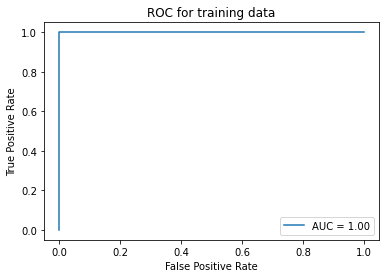

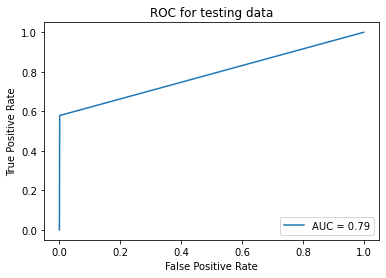

The ROC for training data is the same where as the ROC for testing data is smaller
The new AUC for training data is: 1.0
The new AUC for training data is the same and is reflected in the new ROC graph.
The new AUC for testing data is: 0.7889173333333332
The new AUC for testing data is msmaller now and is reflected in the new ROC graph.


In [86]:
#New ROC, AUC 
new_for_fpr_train, new_for_tpr_train, new_for_thresh_train= roc_curve(y_train, new_rand_for_pred_train)
new_for_fpr_test, new_for_tpr_test, new_for_thresh_test= roc_curve(y_test, new_rand_for_pred_test)
#calculating the auc
new_auc_train = metrics.auc(new_for_fpr_train, new_for_tpr_train)
new_auc_test = metrics.auc(new_for_fpr_test, new_for_tpr_test)
new_rand_for_plot_train = metrics.RocCurveDisplay(fpr=new_for_fpr_train, tpr=new_for_tpr_train, roc_auc=new_auc_train)
new_rand_for_plot_test = metrics.RocCurveDisplay(fpr=new_for_fpr_test, tpr=new_for_tpr_test, roc_auc=new_auc_test)
print('The ROC for training and testing is depicted by the graphs below respectively')
new_rand_for_plot_train.plot()
plt.title('ROC for training data')
plt.show()
new_rand_for_plot_test.plot()
plt.title('ROC for testing data')
plt.show()
print('The ROC for training data is the same where as the ROC for testing data is smaller')
print('The new AUC for training data is: '+str(new_auc_train))
print('The new AUC for training data is the same and is reflected in the new ROC graph.')
print('The new AUC for testing data is: '+str(new_auc_test))
print('The new AUC for testing data is msmaller now and is reflected in the new ROC graph.')

In [87]:
#calculating OOB error
new_error_oob = 1 - new_rand_for.oob_score_
print("The new OOB error is: "+str(new_error_oob)+"\n")
print("When comparing the new OOB error to the new test error (misclassification rate) the new OOB error is smaller.")
print("The new OOB is larger than the one in 1c after class balance.")

The new OOB error is: 0.008016666666666672

When comparing the new OOB error to the new test error (misclassification rate) the new OOB error is smaller.
The new OOB is larger than the one in 1c after class balance.


### (e) XGBoost and Model Trees

In [88]:
alpha_params = [0.0001, 0.001, 0.01, 0.1, 1]
a_info = {}
all_mse_xgb = []
kfold_xgb = KFold(n_splits=5)
for i in alpha_params:
    xgb_cv_scores = -1*model_selection.cross_val_score(XGBClassifier(alpha=i), X_train, y_train, scoring='neg_mean_squared_error', cv=kfold_xgb).mean()
    all_mse_xgb.append(xgb_cv_scores)
    a_info[i] = xgb_cv_scores
smallest_a = min(a_info, key=a_info.get) 
print("The smallest alpha is: "+str(smallest_a))

The smallest alpha is: 1


In [89]:
#finding the train/test error of the model
xgb_reg = XGBClassifier()
xgb_reg.fit(X_train, y_train)
xgb_pred_train = xgb_reg.predict(X_train)
xgb_train_error = mean_squared_error(y_train, xgb_pred_train)
print("The training error of the model is: "+str(xgb_train_error))
xgb_pred_test = xgb_reg.predict(X_test)
xgb_test_error = mean_squared_error(y_test, xgb_pred_test)
print("The test error of the model is: "+str(xgb_test_error))

The training error of the model is: 1.6666666666666667e-05
The test error of the model is: 0.0060625


In [90]:
#finding the confusion matrix for training 
confusion_xgb_train = confusion_matrix(y_train, xgb_pred_train)
print("Training confusion matrix\n"+str(confusion_xgb_train))
#finding the confusion matrix for testing
confusion_xgb_test = confusion_matrix(y_test, xgb_pred_test)
print("Testing confusion matrix\n"+str(confusion_xgb_test))

Training confusion matrix
[[59000     0]
 [    1   999]]
Testing confusion matrix
[[15609    16]
 [   81   294]]


The ROC for training and testing is depicted by the graphs below respectively


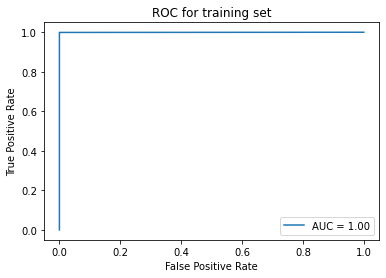

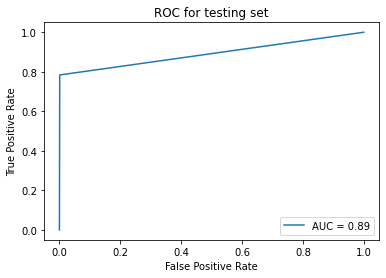

The AUC for training is: 0.9995
The AUC for testing is: 0.891488


In [91]:
#calculating the roc curve for training/testing
xgb_fpr_train, xgb_tpr_train, xgb_thresh_train= roc_curve(y_train, xgb_pred_train)
xgb_fpr_test, xgb_tpr_test, xgb_thresh_test= roc_curve(y_test, xgb_pred_test)
#calculating the auc for training
auc_train_2 = metrics.auc(xgb_fpr_train, xgb_tpr_train)
auc_test_2 = metrics.auc(xgb_fpr_test, xgb_tpr_test)
#plotting roc
xgb_plot_train = metrics.RocCurveDisplay(fpr=xgb_fpr_train, tpr=xgb_tpr_train, roc_auc=auc_train_2)
xgb_plot_test = metrics.RocCurveDisplay(fpr=xgb_fpr_test, tpr=xgb_tpr_test, roc_auc=auc_test_2)
print('The ROC for training and testing is depicted by the graphs below respectively')
xgb_plot_train.plot()
plt.title('ROC for training set')
plt.show()
xgb_plot_test.plot()
plt.title('ROC for testing set')
plt.show()
print('The AUC for training is: ' +str(auc_train_2))
print('The AUC for testing is: ' +str(auc_test_2))

### (f) Use SMOTE to pre-process your data

In [92]:
#REFERNCE: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
#
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
alpha_params_2 = [0.0001, 0.001, 0.01, 0.1, 1]
a_info_2 = {}
all_mse_xgb_2 = []
kfold_xgb_2 = KFold(n_splits=5)
for i in alpha_params_2:
    xgb_cv_scores_2 = -1*model_selection.cross_val_score(XGBClassifier(alpha=i), res_x_train, res_y_train, scoring='neg_mean_absolute_error', cv=kfold_xgb_2).mean()
    all_mse_xgb_2.append(xgb_cv_scores_2)
    a_info_2[i] = xgb_cv_scores_2
smallest_a_2 = min(a_info_2, key=a_info_2.get) 
print("The smallest alpha is: "+str(smallest_a_2))

AttributeError: 'NoneType' object has no attribute 'split'

In [67]:
print(sklearn.show_versions())


System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Daniel\anaconda3\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
      sklearn: 1.2.0
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
#finding the train/test error of the model
xgb_reg_2 = XGBClassifier()
xgb_reg_2.fit(X_train, y_train)
xgb_pred_train_2 = xgb_reg_2.predict(X_train)
xgb_train_error_2 = mean_squared_error(y_train, xgb_pred_train_2)
print("The training error of the model is: "+str(xgb_train_error_2))
xgb_pred_test_2 = xgb_reg_2.predict(X_test)
xgb_test_error_2 = mean_squared_error(y_test, xgb_pred_test_2)
print("The test error of the model is: "+str(xgb_test_error_2))

In [ ]:
#finding the confusion matrix for training 
confusion_xgb_train_2 = confusion_matrix(y_train, xgb_pred_train_2)
print("Training confusion matrix\n"+str(confusion_xgb_train_2))
#finding the confusion matrix for testing
confusion_xgb_test_2 = confusion_matrix(y_test, xgb_pred_test_2)
print("Testing confusion matrix\n"+str(confusion_xgb_test_2))

In [ ]:
#calculating the roc curve for training/testing
xgb_fpr_train_2, xgb_tpr_train_2, xgb_thresh_train_2= roc_curve(y_train, xgb_pred_train_2)
xgb_fpr_test_2, xgb_tpr_test_2, xgb_thresh_test_2= roc_curve(y_test, xgb_pred_test_2)
#calculating the auc for training
auc_train_3 = metrics.auc(xgb_fpr_train_2, xgb_tpr_train_2)
auc_test_3 = metrics.auc(xgb_fpr_test_2, xgb_tpr_test_2)
#plotting roc
xgb_plot_train_2 = metrics.RocCurveDisplay(fpr=xgb_fpr_train_2, tpr=xgb_tpr_train_2, roc_auc=auc_train_3)
xgb_plot_test_2 = metrics.RocCurveDisplay(fpr=xgb_fpr_test_2, tpr=xgb_tpr_test_2, roc_auc=auc_test_3)
print('The ROC for training and testing is depicted by the graphs below respectively')
xgb_plot_train_2.plot()
plt.title('ROC for training set')
plt.show()
xgb_plot_test_2.plot()
plt.title('ROC for testing set')
plt.show()
print('The AUC for training is: ' +str(auc_train_3))
print('The AUC for testing is: ' +str(auc_test_3))

## 2. ISLR 6.6.3

## 3. ISLR 6.6.5

## 4. ISLR 8.4.5

## 5. ISLR 9.7.3